In [1]:
cd /Users/louis/Desktop/jimlab/data/new_data

/Users/louis/Desktop/jimlab/data/new_data


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import extract_good


In [6]:
ls

RawData.mat      autoencoder2.py  encoder.py
SGfilter.py      data_2.csv       extract_good.py
__pycache__/     detect_peaks.py  long_seq.py


In [7]:
data = pd.read_csv("data_2.csv", index_col = False)

In [8]:
data.drop("Unnamed: 0", axis =1, inplace = True)

In [9]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '15990', '15991', '15992', '15993', '15994', '15995', '15996', '15997',
       '15998', '15999'],
      dtype='object', length=16000)

In [10]:
data.head()

0         1         2         3         4         5         6  \
0  413972.0  413561.0  413141.0  412675.0  412288.0  411841.0  411429.0   
1  383454.0  422724.0  423017.0  423053.0  423247.0  423202.0  423428.0   
2  430011.0  430250.0  430294.0  430566.0  429972.0  429843.0  429715.0   
3  500508.0  627384.0  626899.0  626376.0  625886.0  625440.0  625024.0   
4  555544.0  586937.0  587148.0  587415.0  587727.0  587957.0  588219.0   

          7         8         9    ...        15990     15991     15992  \
0  411003.0  410558.0  410213.0    ...     381301.0  381169.0  380792.0   
1  423546.0  423810.0  423783.0    ...     398916.0  398256.0  397551.0   
2  429793.0  429825.0  429872.0    ...     338208.0  338489.0  338645.0   
3  624701.0  624433.0  624117.0    ...     562200.0  562467.0  562633.0   
4  588452.0  588717.0  588973.0    ...     382564.0  382593.0  382589.0   

      15993     15994     15995     15996     15997     15998     15999  
0  380794.0  380262.0  380203.0  379803.0  379780.0  379356.0  379271.0  
1  396697.0  395826.0  394929.0  394059.0  393183.0  392350.0  391495.0  
2  338838.0  338072.0  337354.0  337499.0  337723.0  337782.0  337214.0  
3  562790.0  562999.0  563156.0  563404.0  563562.0  563732.0  563951.0  
4  382614.0  382677.0  382790.0  382912.0  382938.0  383033.0  383116.0  

[5 rows x 16000 columns]

In [11]:
data.shape

(18617, 16000)

In [39]:
total_final_ranges = []

In [40]:
for idx in range(len(data)):
    dt = np.array(data.iloc[idx], dtype = np.float64)
    peak, good_peak, good_peak_x, valley, good_valley, good_valley_x = extract_good.extract(dt, 150, 10, 2, 30000,False)
    good_peak_ranges = extract_good.set_range(good_peak, 10, peak)
    good_valley_ranges = extract_good.set_range(good_valley, 10, valley)
    final_range = extract_good.merge_range(good_peak_ranges, good_valley_ranges)
    if len(final_range) ==  0:
        peak, good_peak, good_peak_x, valley, good_valley, good_valley_x = extract_good.extract(dt, 100, 10, 2, 30000,False)
        good_peak_ranges = extract_good.set_range(good_peak, 10, peak)
        good_valley_ranges = extract_good.set_range(good_valley, 10, valley)
        final_range = extract_good.merge_range(good_peak_ranges, good_valley_ranges)
    total_final_ranges.append([idx, final_range, good_valley_x])

In [41]:
no_good_idx = []
for i in range(len(total_final_ranges)):
    if len(total_final_ranges[i][1]) == 0:
        no_good_idx.append(i)

In [42]:
print(len(no_good_idx))

0


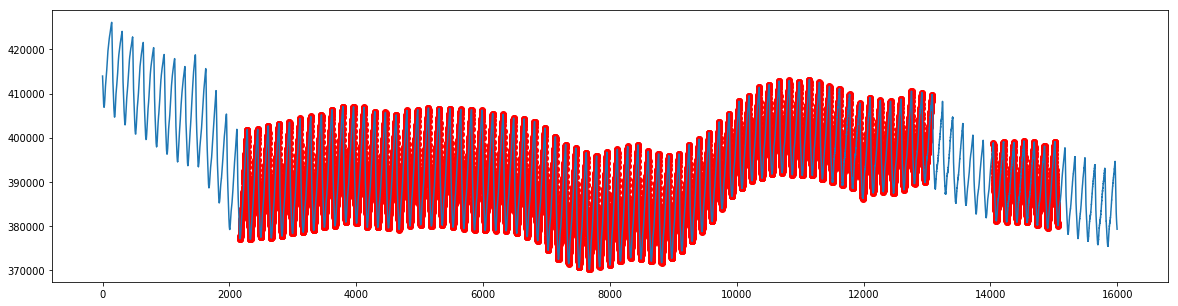

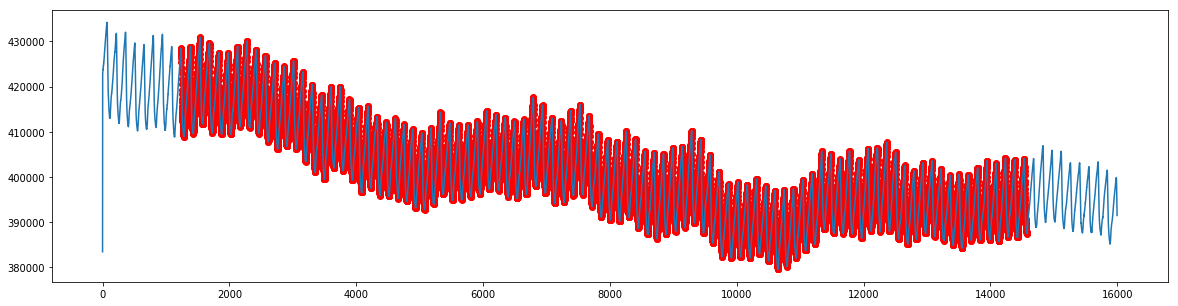

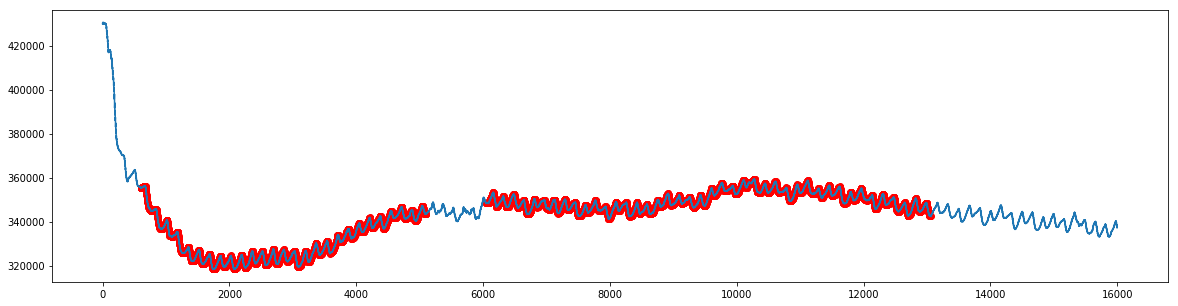

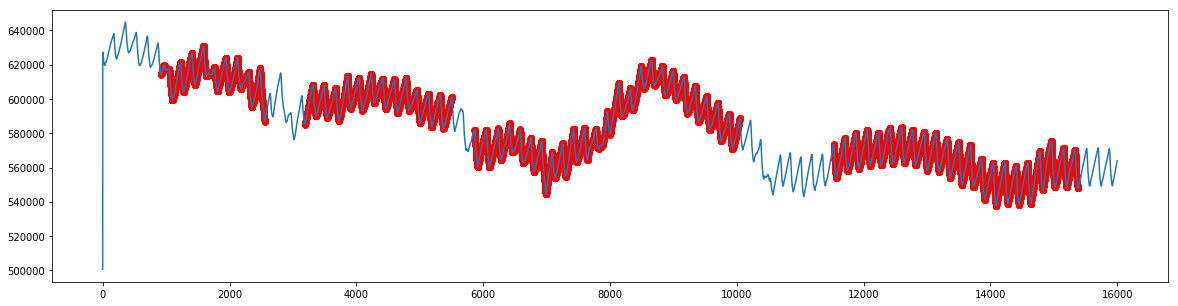

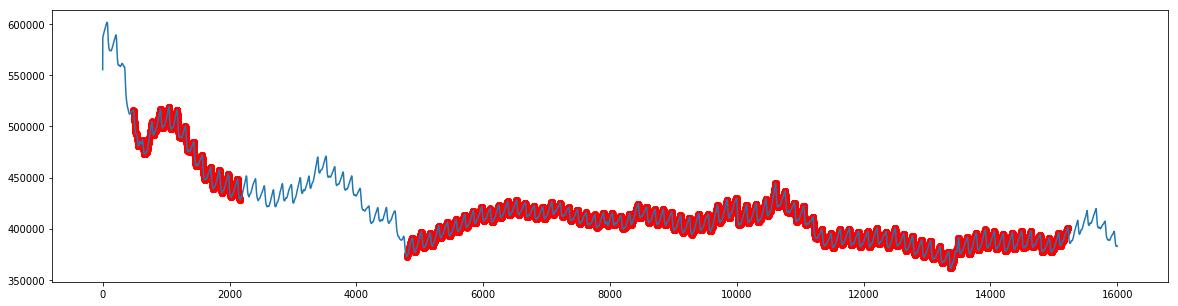

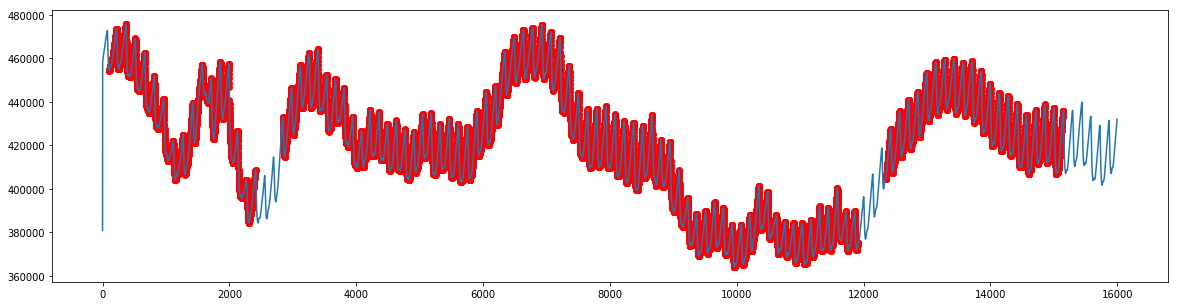

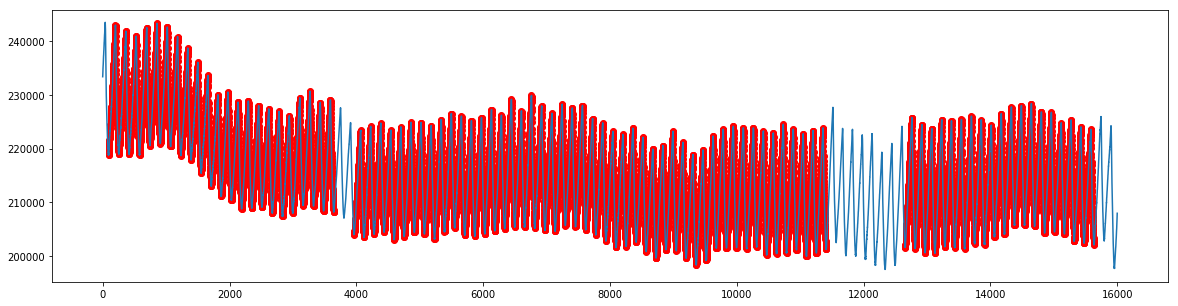

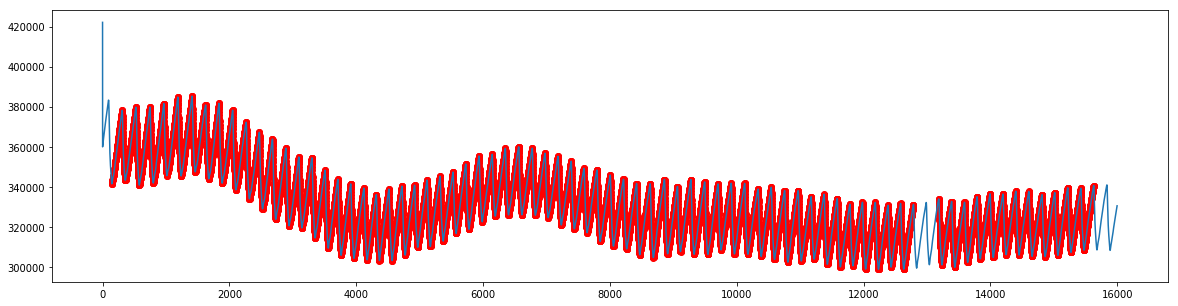

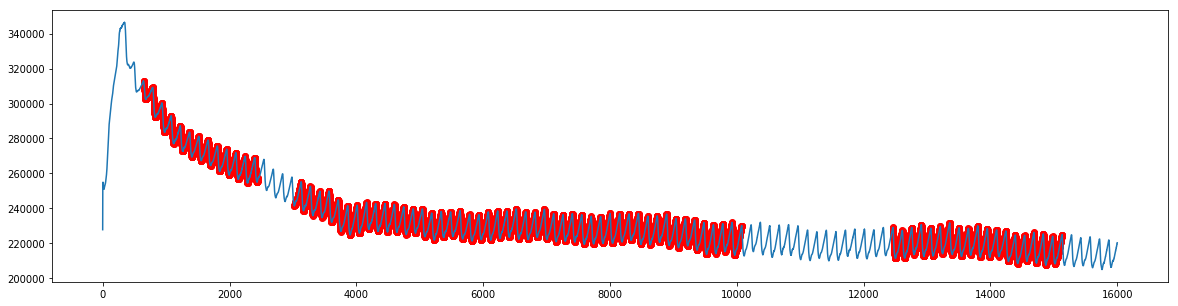

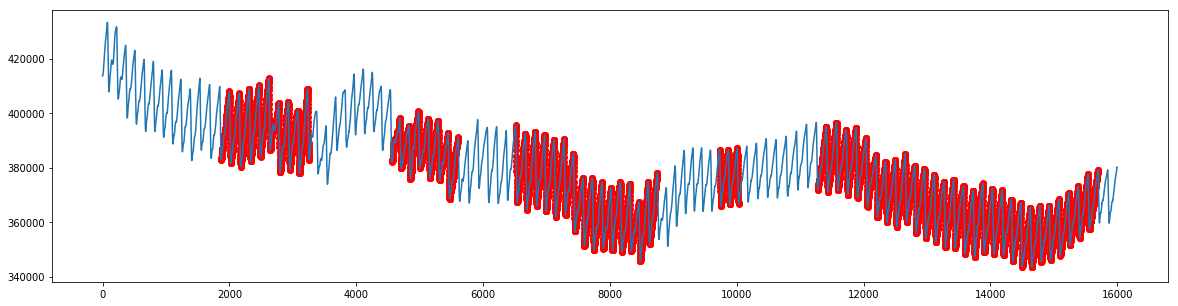

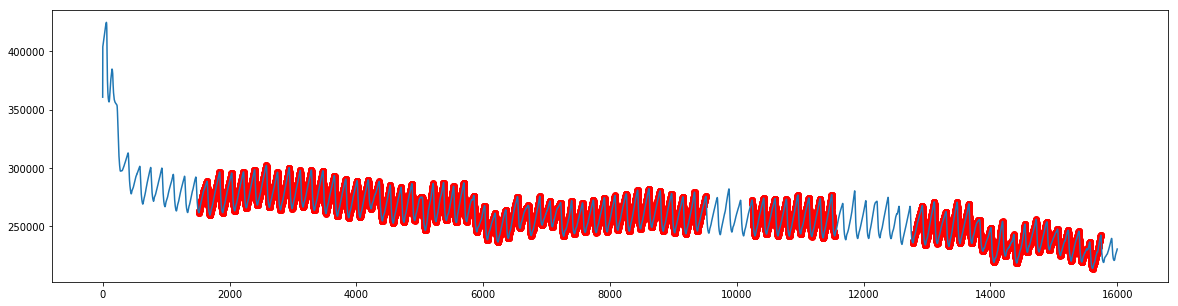

In [43]:
for i in range(len(total_final_ranges)):
    idx = total_final_ranges[i][0]
    dt = np.array(data.iloc[idx], dtype = np.float64)
    final_range = total_final_ranges[idx][1]
    plt.figure(figsize=(20,5))
    for i in final_range:
        idxx = [j for j in range(i[0],i[1] + 1)]
        plt.scatter(idxx,dt[idxx], color = 'red')
    plt.plot(dt)
    plt.show()
    if idx == 10:
        break

## check if all good section has points more than 1700

In [44]:
not_enough = []
for i in range(len(total_final_ranges)):
    tmp = total_final_ranges[i]
    idxx = tmp[0]
    tmp_range = tmp[1]
    flag = True
    for j in tmp_range:
        if (j[1] - j[0]) >= 1700:
            flag = False
    if flag:
        not_enough.append(idxx)

In [45]:
not_enough


[3050,
 3193,
 3559,
 5892,
 8151,
 8479,
 10054,
 10483,
 12370,
 12619,
 12848,
 13870,
 14363]

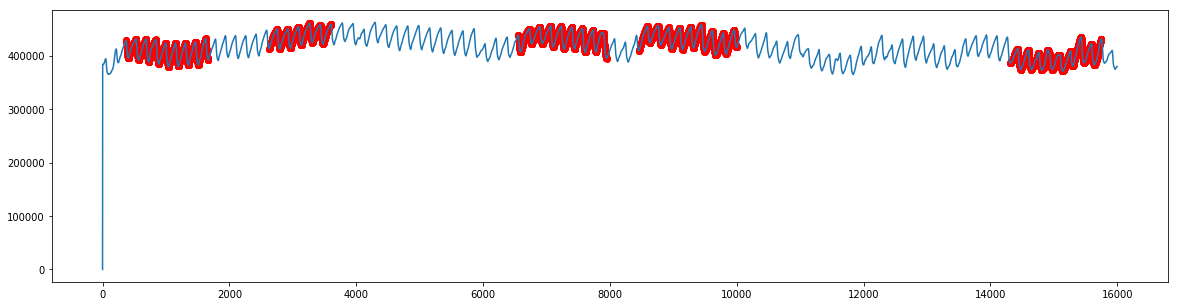

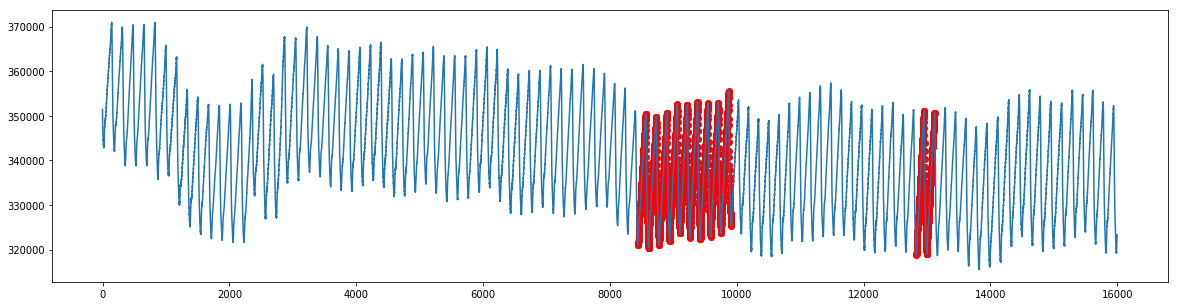

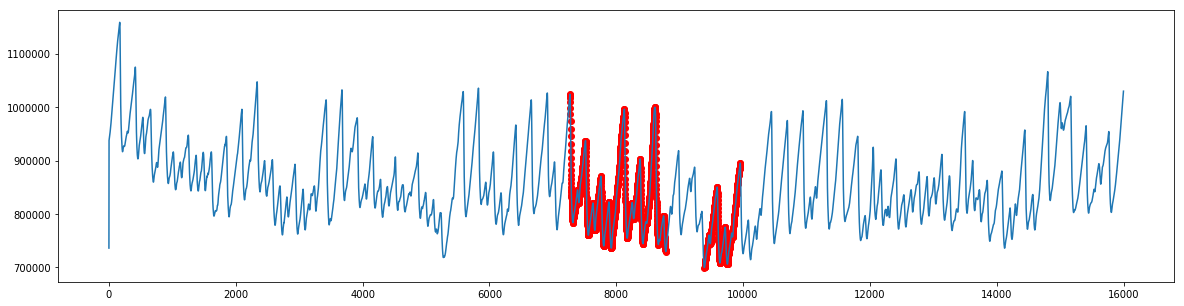

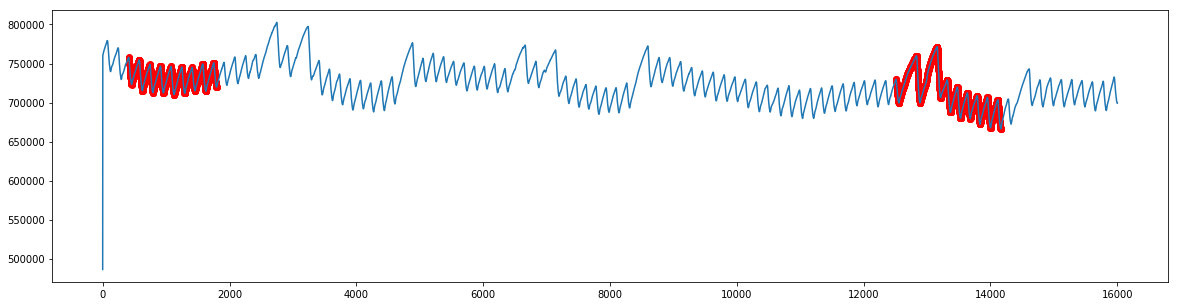

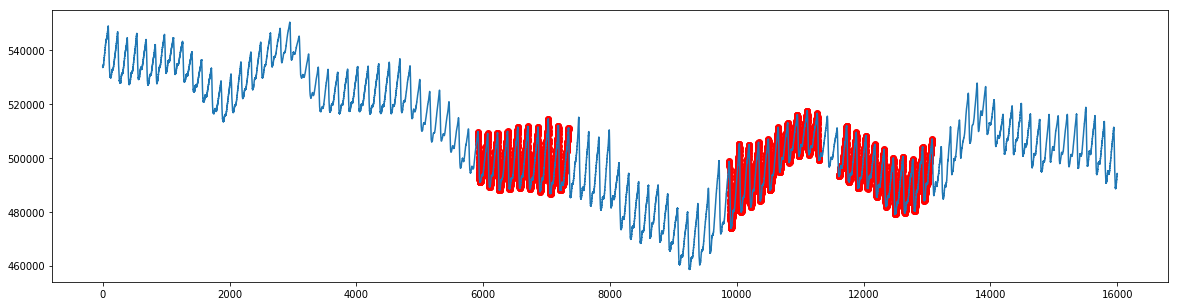

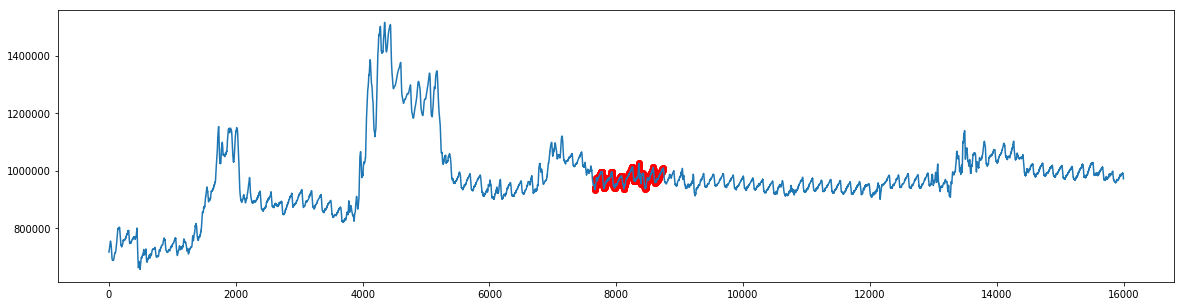

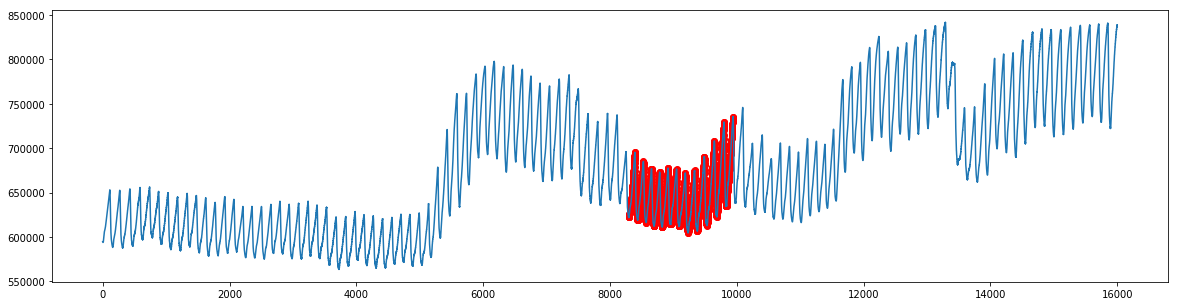

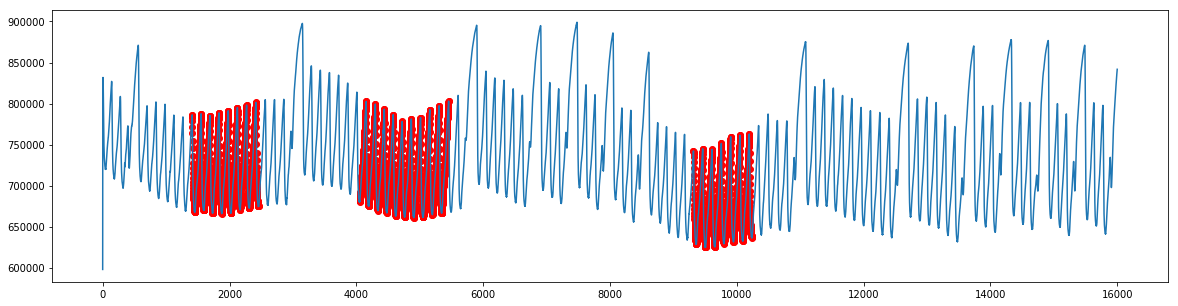

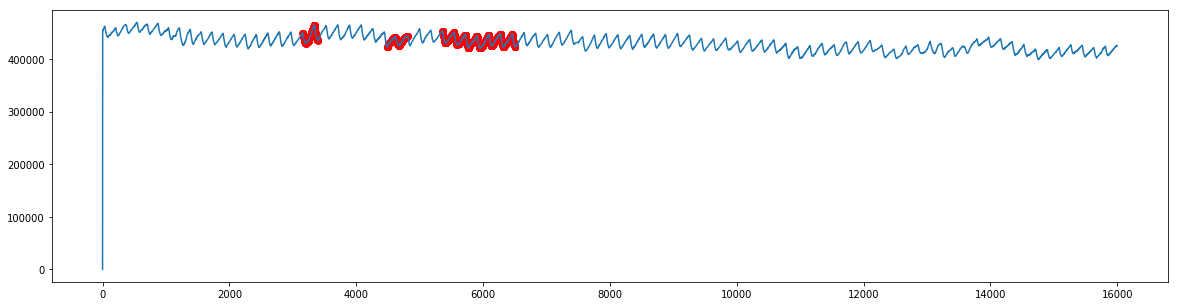

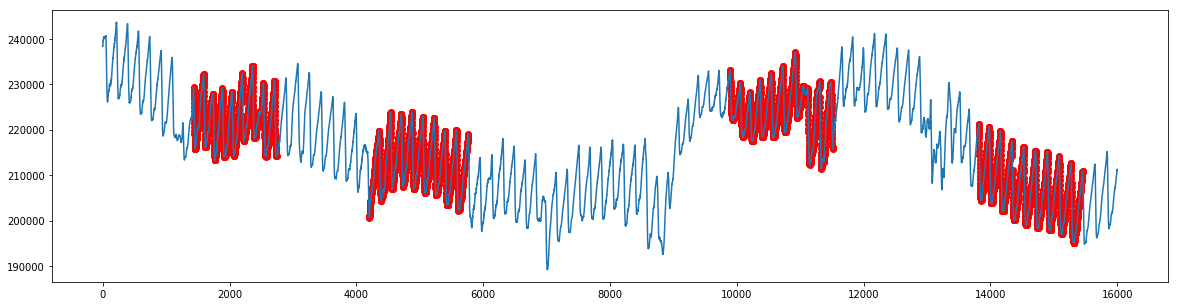

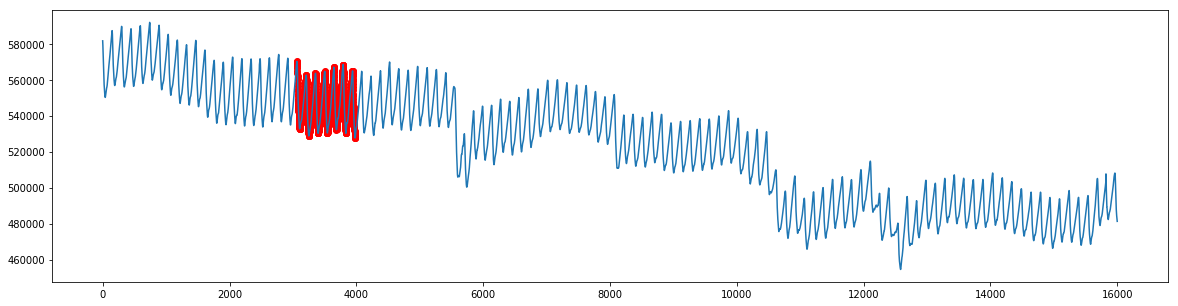

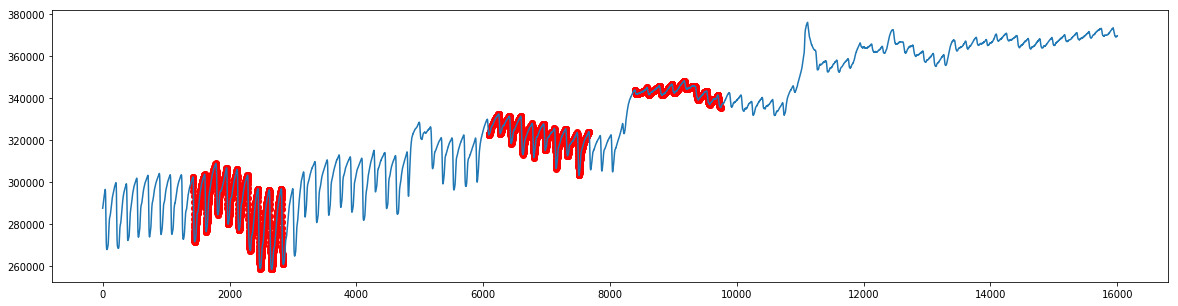

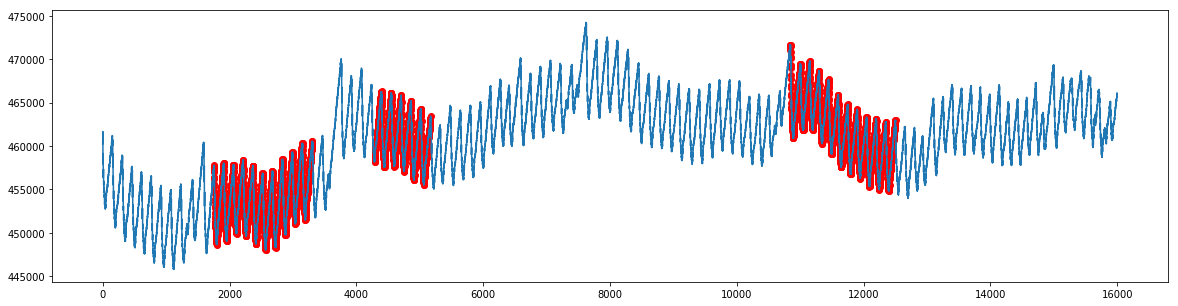

In [46]:
for i in range(len(not_enough)):
    idx = not_enough[i]
    dt = np.array(data.iloc[idx], dtype = np.float64)
    final_range = total_final_ranges[idx][1]
    plt.figure(figsize=(20,5))
    for i in final_range:
        idxx = [j for j in range(i[0],i[1] + 1)]
        plt.scatter(idxx,dt[idxx], color = 'red')
    plt.plot(dt)
    plt.show()

## for those already over 1700, we choose the lowest std or longest and set length as 1500 and it should start from a valley

In [47]:
total_final_ranges[0]

[0,
 [[2168, 13082], [14048, 15065]],
 array([ 2168,  2331,  2495,  2662,  2829,  2996,  3164,  3332,  3501,
         3668,  3838,  4005,  4177,  4342,  4507,  4678,  4848,  5018,
         5186,  5356,  5527,  5698,  5866,  6034,  6200,  6365,  6531,
         6697,  6861,  7027,  7191,  7350,  7514,  7676,  7838,  8000,
         8167,  8329,  8492,  8655,  8817,  8976,  9135,  9295,  9452,
         9611,  9771,  9924, 10086, 10243, 10401, 10558, 10718, 10877,
        11036, 11195, 11353, 11513, 11667, 11827, 11989, 12151, 12313,
        12474, 12637, 12805, 12971, 13133, 13295, 13456, 13614, 13776,
        13936, 14095, 14257, 14419, 14579, 14741, 14905, 15065])]

In [48]:
len(total_final_ranges)

18617

In [49]:
good_data = []

In [50]:
for i in range(len(total_final_ranges)):
    tmp = total_final_ranges[i]
    idxx = tmp[0]
    if idxx in not_enough:
        continue
    tmp_range = tmp[1]
    valley_x = tmp[2]
    min_std = 100000000000
    target = []
    for j in tmp_range:
        tmp_std = np.std(data.iloc[idxx][j[0] : (j[1] + 1)])
        if tmp_std < min_std:
            min_std = tmp_std
            for k in valley_x:
                if k >= j[0]:
                    target = [k, j[1]]
                    break
            
    if len(target) > 0:
        good_data.append(data.iloc[idxx][target[0] : (target[0] + 1500)].values)
        

In [51]:
len(good_data)

18604

## for not enough data

In [52]:
not_enough

[3050,
 3193,
 3559,
 5892,
 8151,
 8479,
 10054,
 10483,
 12370,
 12619,
 12848,
 13870,
 14363]

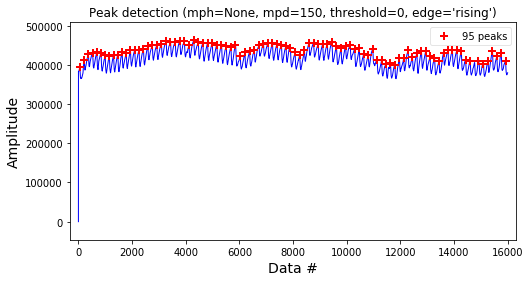

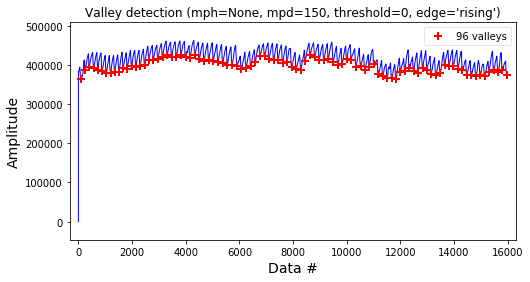

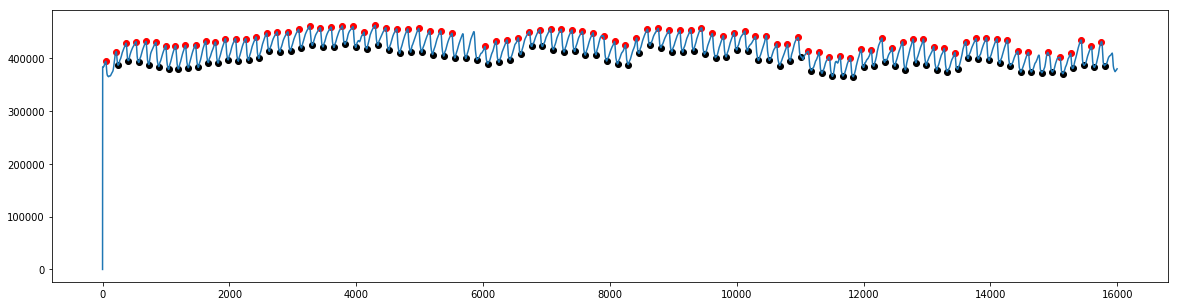

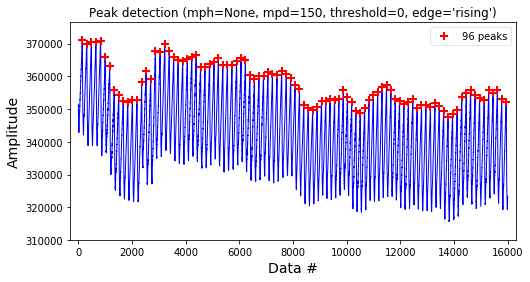

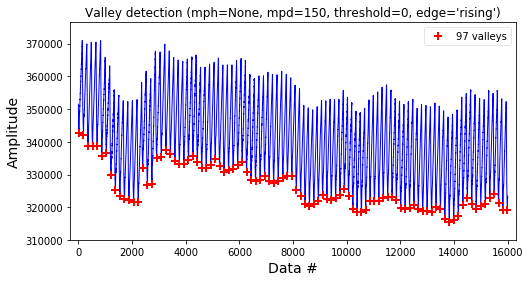

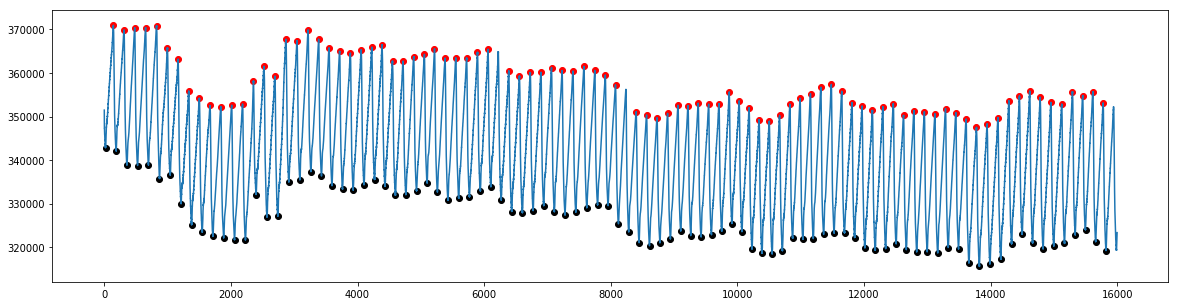

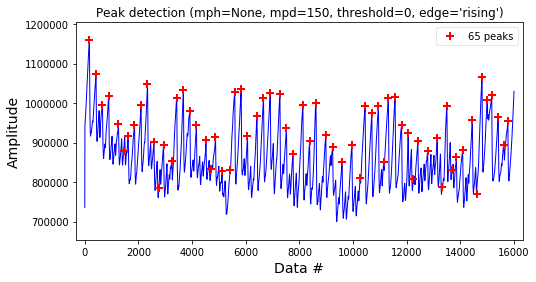

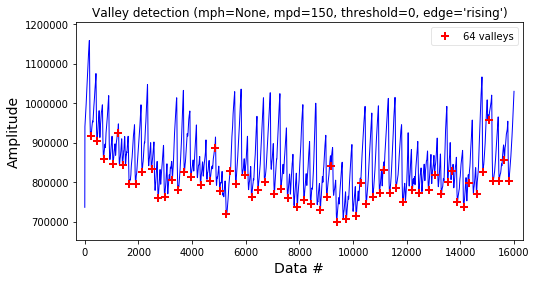

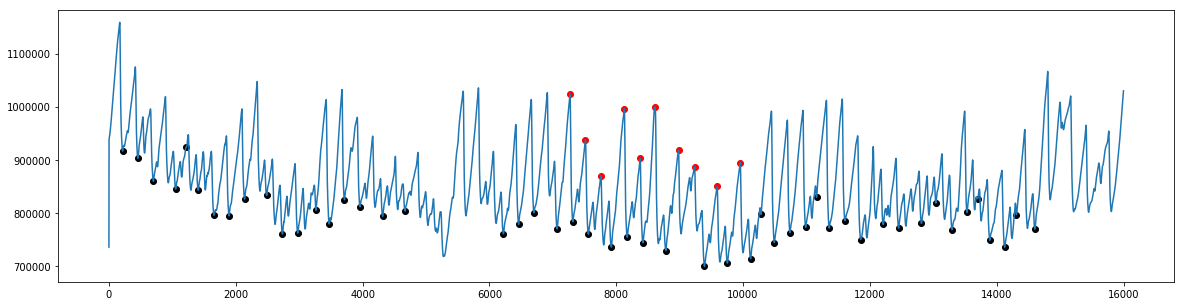

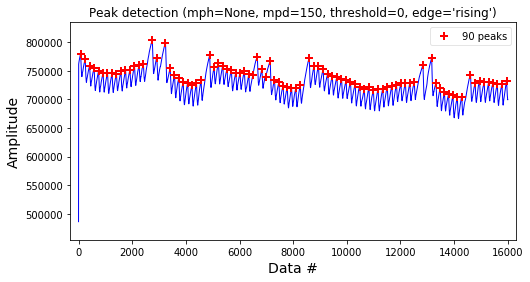

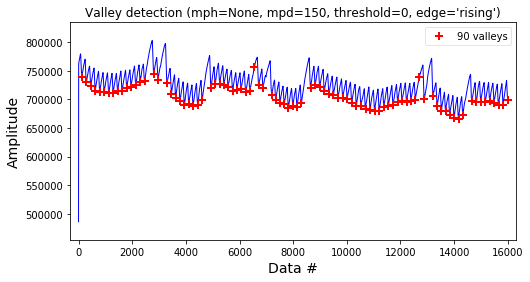

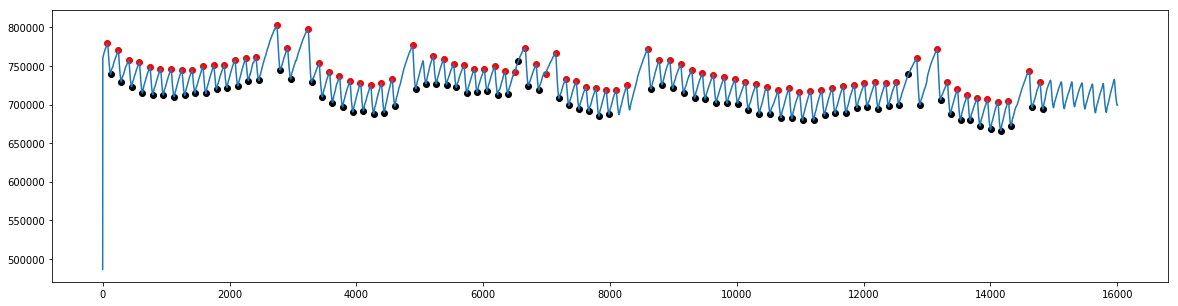

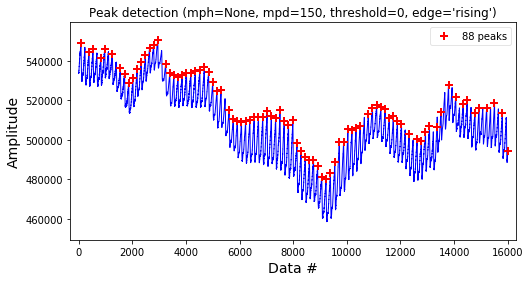

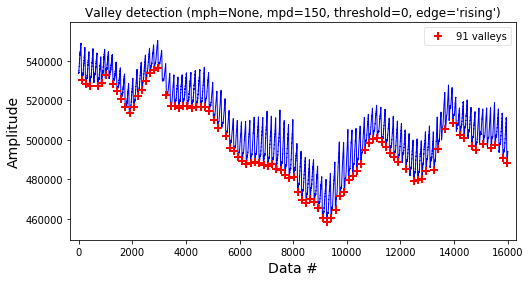

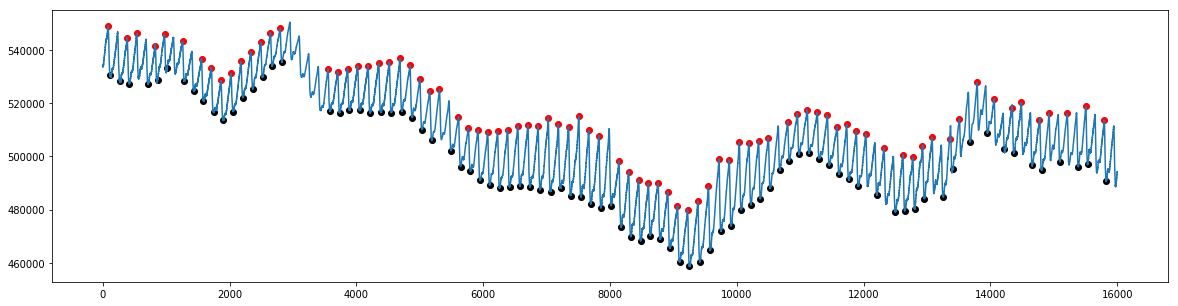

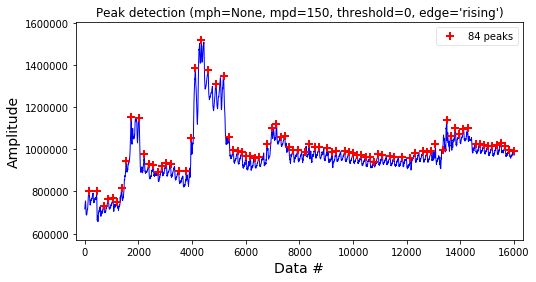

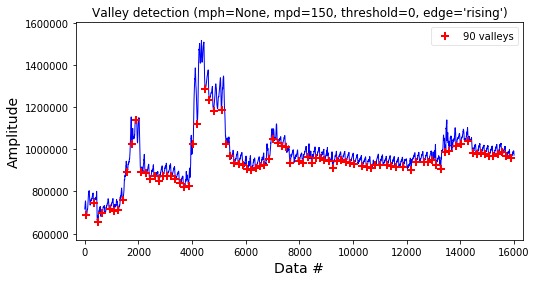

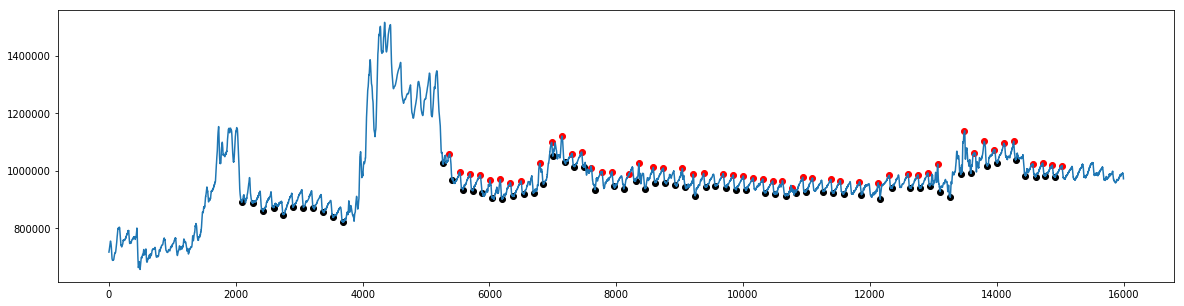

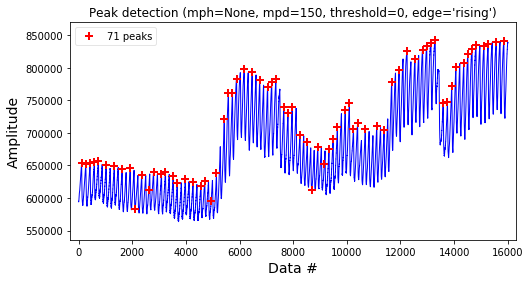

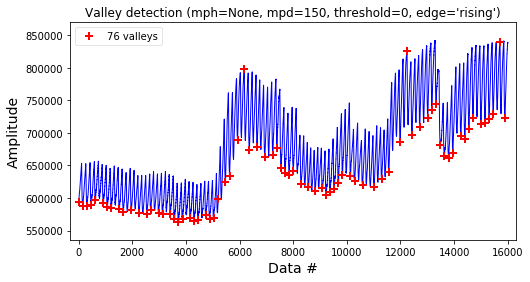

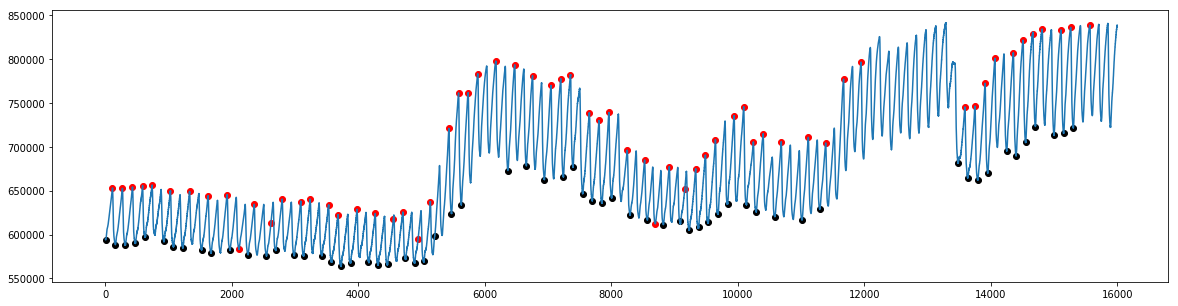

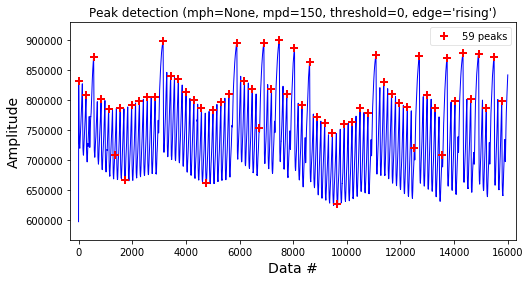

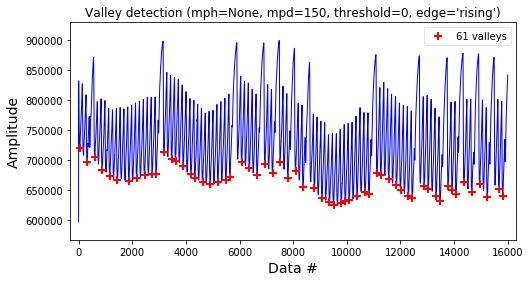

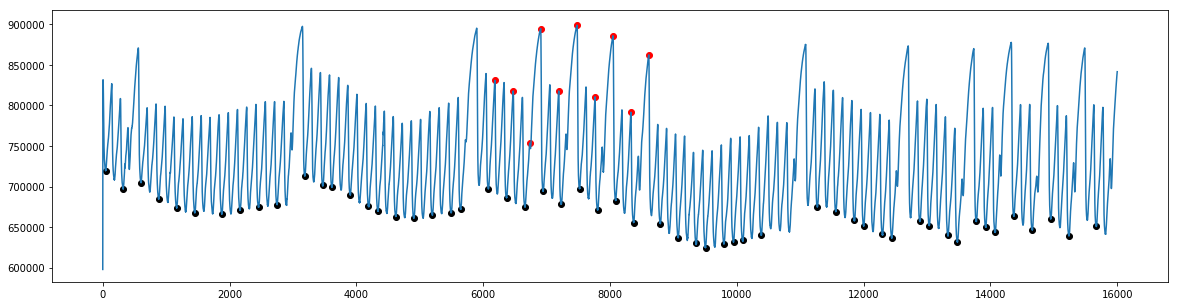

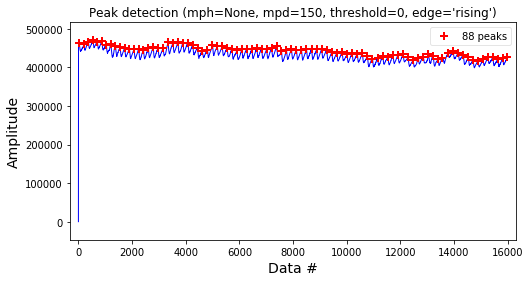

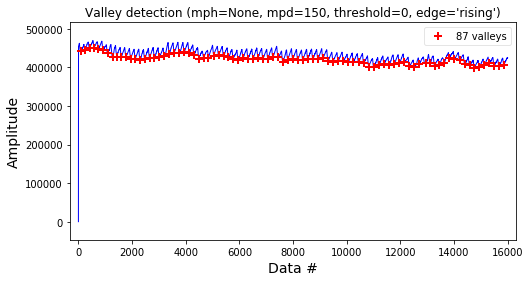

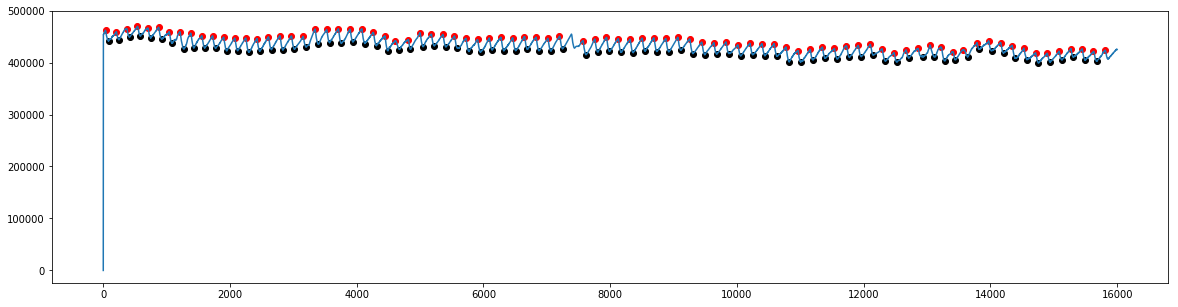

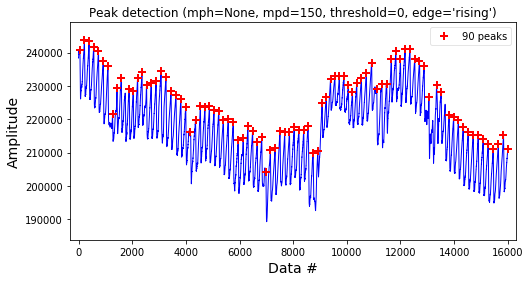

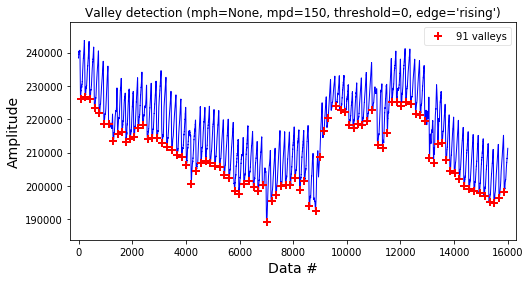

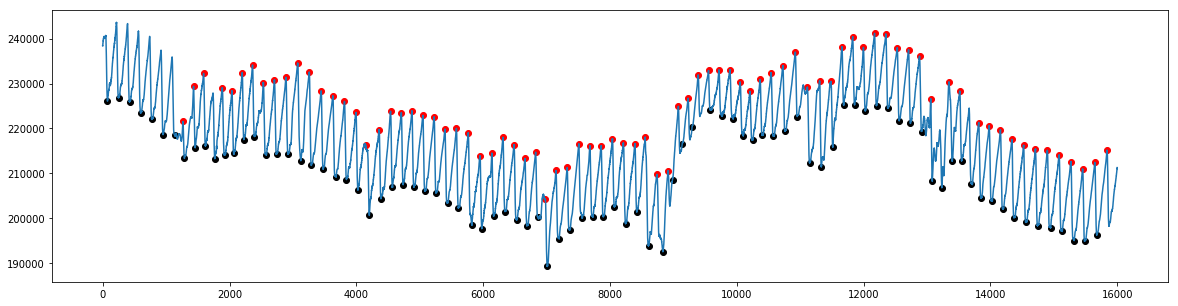

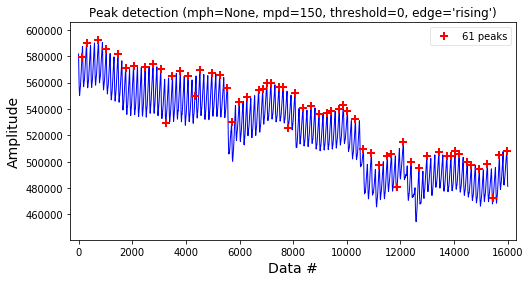

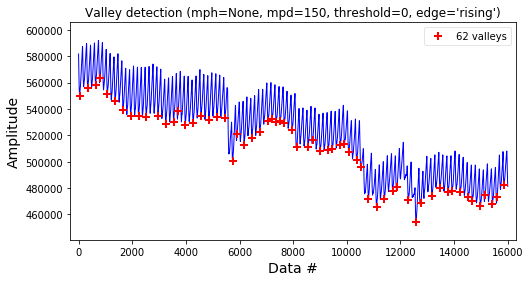

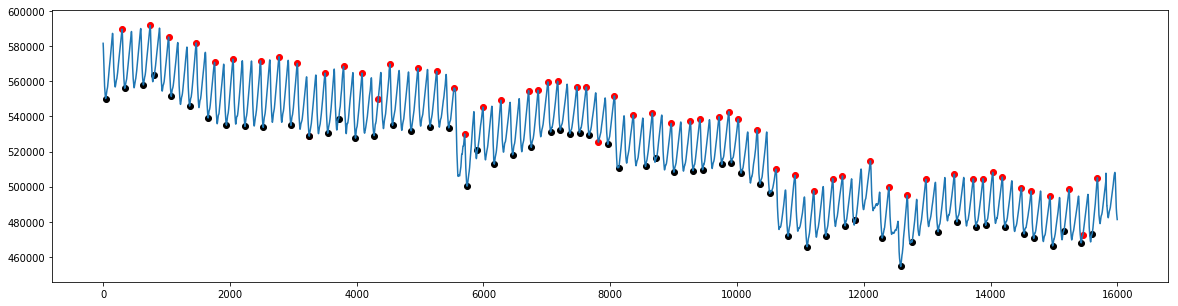

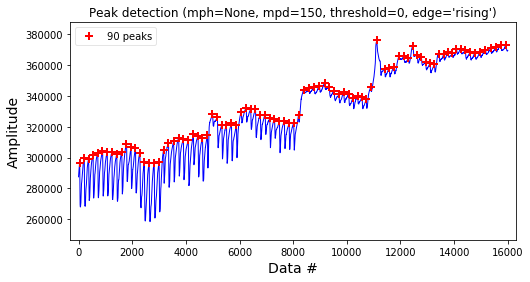

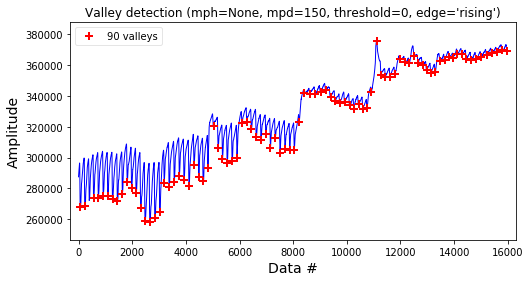

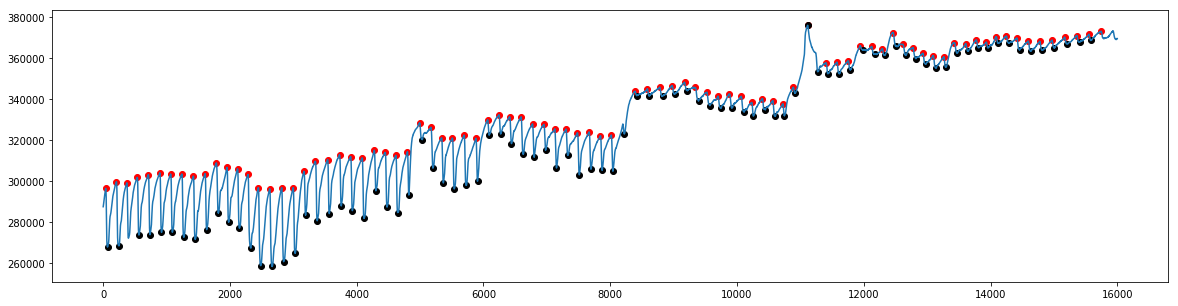

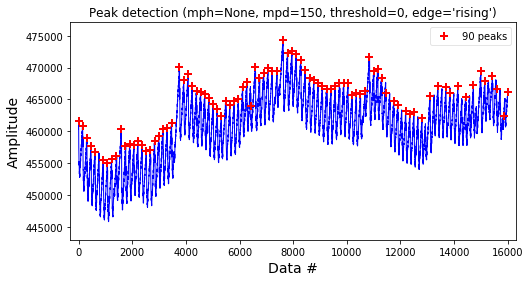

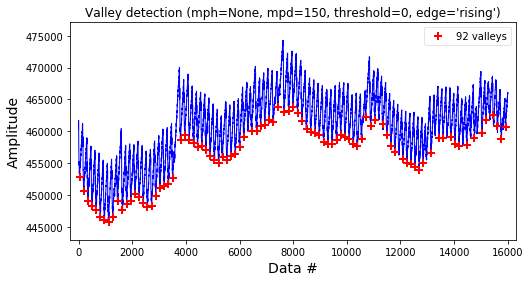

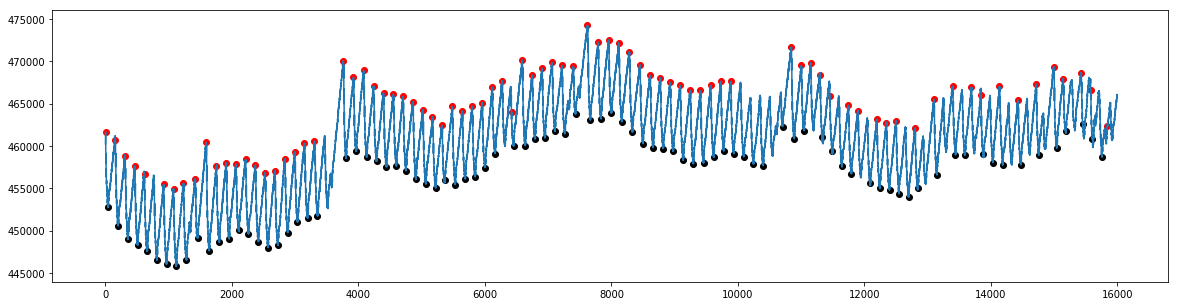

In [53]:
for i in range(len(not_enough)):
    idx = not_enough[i]
    dt = np.array(data.iloc[idx], dtype = np.float64)
    peak, good_peak, good_peak_x, valley, good_valley, good_valley_x = extract_good.extract(dt, 150, 10, 2.5, 30000,True)
    good_peak_ranges = extract_good.set_range(good_peak, 10, peak)
    good_valley_ranges = extract_good.set_range(good_valley, 10, valley)
    final_range = extract_good.merge_range(good_peak_ranges, good_valley_ranges)

## modify parameters

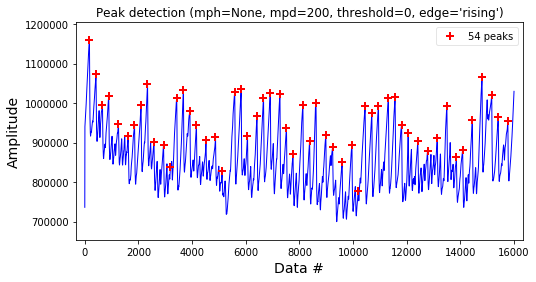

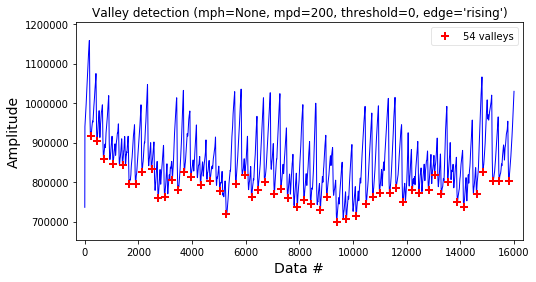

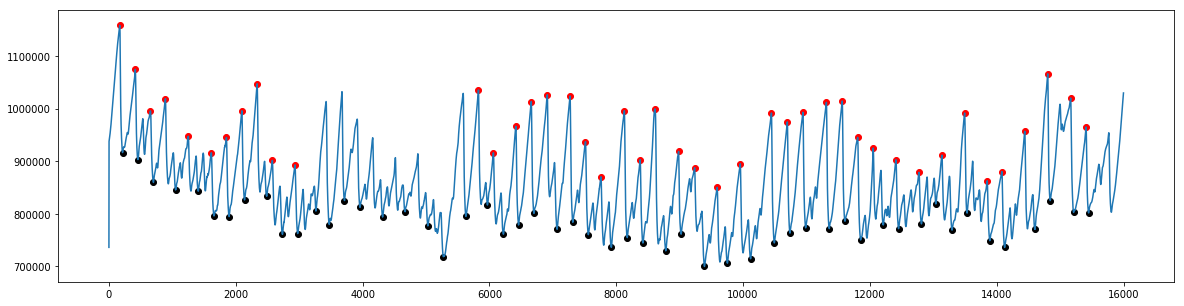

In [54]:
for i in [2]:
    idx = not_enough[i]
    dt = np.array(data.iloc[idx], dtype = np.float64)
    peak, good_peak, good_peak_x, valley, good_valley, good_valley_x = extract_good.extract(dt, 200, 10, 3, 40000,True)
    good_peak_ranges = extract_good.set_range(good_peak, 10, peak)
    good_valley_ranges = extract_good.set_range(good_valley, 10, valley)
    final_range = extract_good.merge_range(good_peak_ranges, good_valley_ranges)

In [55]:
final_range

[[215, 2934], [5827, 9956], [10447, 15409]]

In [56]:
not_enough

[3050,
 3193,
 3559,
 5892,
 8151,
 8479,
 10054,
 10483,
 12370,
 12619,
 12848,
 13870,
 14363]

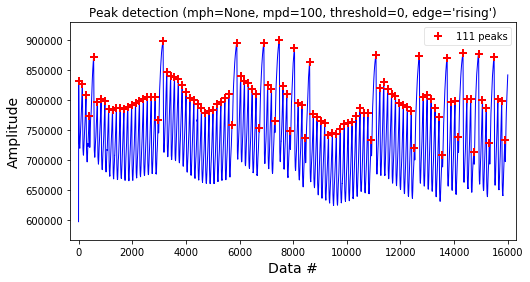

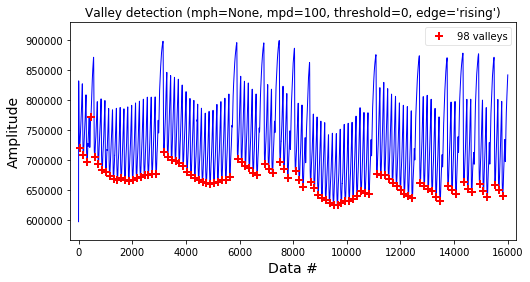

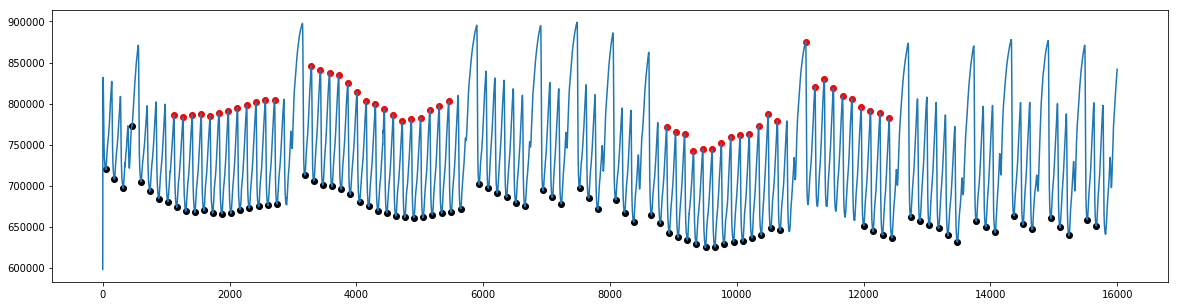

In [57]:
for i in [7]:
    idx = not_enough[i]
    dt = np.array(data.iloc[idx], dtype = np.float64)
    peak, good_peak, good_peak_x, valley, good_valley, good_valley_x = extract_good.extract(dt, 100, 10, 2.5, 30000,True)
    good_peak_ranges = extract_good.set_range(good_peak, 10, peak)
    good_valley_ranges = extract_good.set_range(good_valley, 10, valley)
    final_range = extract_good.merge_range(good_peak_ranges, good_valley_ranges)

In [58]:
not_enough_ranges = []
for i in range(len(not_enough)):
    idx = not_enough[i]
    print(i)
    print(idx)
    dt = np.array(data.iloc[idx], dtype = np.float64)
    if i == 2:
        peak, good_peak, good_peak_x, valley, good_valley, good_valley_x = extract_good.extract(dt, 200, 10, 3, 40000,False)
    elif i == 7:
        peak, good_peak, good_peak_x, valley, good_valley, good_valley_x = extract_good.extract(dt, 100, 10, 2.5, 30000,False)
    else:
        peak, good_peak, good_peak_x, valley, good_valley, good_valley_x = extract_good.extract(dt, 150, 10, 2.5, 30000,False)
    good_peak_ranges = extract_good.set_range(good_peak, 10, peak)
    good_valley_ranges = extract_good.set_range(good_valley, 10, valley)
    final_range = extract_good.merge_range(good_peak_ranges, good_valley_ranges)
    not_enough_ranges.append([idx, final_range, good_valley_x])
    print(final_range)

0
3050
[[248, 5508], [6030, 15753]]
1
3193
[[144, 6063], [6391, 8076], [8401, 15779]]
2
3559
[[215, 2934], [5827, 9956], [10447, 15409]]
3
5892
[[125, 4886], [5213, 7986], [8648, 14780]]
4
8151
[[115, 2798], [3583, 7825], [8142, 15796]]
5
8479
[[5370, 13070], [13492, 14919]]
6
10054
[[113, 5629], [6364, 11296], [13590, 15304]]
7
10483
[[1122, 2709], [3290, 5455], [8891, 10639], [12002, 12403]]
8
12370
[[83, 7199], [7619, 15679]]
9
12619
[[1267, 15677]]
10
12848
[[298, 15602]]
11
13870
[[68, 8017], [8391, 15583]]
12
14363
[[42, 3305], [3801, 9888], [10840, 15756]]


In [59]:
not_enough_ranges[2]

[3559,
 [[215, 2934], [5827, 9956], [10447, 15409]],
 array([  215,   457,   701,  1051,  1409,  1657,  1895,  2138,  2489,
         2736,  2977,  3264,  3473,  3714,  3959,  4316,  4670,  5030,
         5274,  5631,  5968,  6221,  6460,  6702,  7067,  7316,  7560,
         7923,  8174,  8421,  8781,  9023,  9391,  9754, 10119, 10493,
        10740, 10988, 11359, 11606, 11854, 12212, 12453, 12813, 13040,
        13296, 13533, 13891, 14124, 14602, 14843, 15213, 15449])]

In [60]:
not_enough_2 = []
for i in range(len(not_enough_ranges)):
    tmp = not_enough_ranges[i]
    idxx = tmp[0]
    tmp_range = tmp[1]
    flag = True
    for j in tmp_range:
        if (j[1] - j[0]) >= 1700:
            flag = False
    if flag:
        not_enough_2.append(idxx)

In [61]:
not_enough_2

[]

## Now all data would satisfy our requirement

In [62]:
for i in range(len(not_enough_ranges)):
    tmp = not_enough_ranges[i]
    idxx = tmp[0]
    tmp_range = tmp[1]
    valley_x = tmp[2]
    min_std = 100000000000
    target = []
    for j in tmp_range:
        tmp_std = np.std(data.iloc[idxx][j[0] : (j[1] + 1)])
        if tmp_std < min_std:
            min_std = tmp_std
            for k in valley_x:
                if k >= j[0]:
                    target = [k, j[1]]
                    break
            
    if len(target) > 0:
        good_data.append(data.iloc[idxx][target[0] : (target[0] + 1500)].values)

In [63]:
len(good_data)

18617

In [64]:
good_df = pd.DataFrame(good_data)


In [65]:
good_df.shape

(18617, 1500)

In [66]:
good_df.head()

0         1         2         3         4         5         6     \
0  381204.0  381259.0  381211.0  381343.0  381321.0  381537.0  381542.0   
1  409606.0  409731.0  409630.0  409794.0  409805.0  409937.0  410104.0   
2  348237.0  348383.0  348247.0  348392.0  348386.0  348576.0  348326.0   
3  585105.0  585198.0  585347.0  585497.0  585657.0  585938.0  586201.0   
4  372668.0  372731.0  372858.0  373020.0  373148.0  373370.0  373590.0   

       7         8         9       ...         1490      1491      1492  \
0  381835.0  381930.0  382176.0    ...     383389.0  383366.0  383724.0   
1  410286.0  410434.0  410673.0    ...     408440.0  408651.0  409119.0   
2  348462.0  348339.0  348468.0    ...     342845.0  342792.0  342743.0   
3  586372.0  586622.0  586831.0    ...     595396.0  595553.0  595757.0   
4  373795.0  373977.0  374238.0    ...     410704.0  410660.0  410706.0   

       1493      1494      1495      1496      1497      1498      1499  
0  383754.0  384043.0  383985.0  384425.0  384486.0  384885.0  384845.0  
1  409367.0  409709.0  409936.0  410217.0  410438.0  410739.0  410937.0  
2  342735.0  342931.0  343097.0  343017.0  342953.0  342930.0  343047.0  
3  595901.0  596083.0  596251.0  596406.0  596652.0  596803.0  597043.0  
4  410740.0  410852.0  410930.0  411088.0  411278.0  411476.0  411638.0  

[5 rows x 1500 columns]

In [67]:
good_df.isnull().sum()

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1470    1
1471    1
1472    1
1473    1
1474    1
1475    1
1476    1
1477    1
1478    1
1479    1
1480    1
1481    1
1482    1
1483    1
1484    1
1485    1
1486    1
1487    1
1488    1
1489    1
1490    1
1491    1
1492    1
1493    1
1494    1
1495    1
1496    1
1497    1
1498    1
1499    1
Length: 1500, dtype: int64

In [68]:
np.where(np.isnan(good_df))


(array([13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392,
        13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392,
        13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392,
        13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392,
        13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392,
        13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392,
        13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392,
        13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392,
        13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392,
        13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392,
        13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392,
        13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392, 13392]),
 array([1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401,
        1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 141

In [78]:
good_df.dropna(axis = 0, inplace = True)

In [81]:
good_df.shape

(18616, 1500)

In [82]:
good_df.to_csv("good_data_starts_valley.csv", index = None)

In [83]:
test = pd.read_csv("good_data_starts_valley.csv")

In [84]:
test.head()

0         1         2         3         4         5         6  \
0  381204.0  381259.0  381211.0  381343.0  381321.0  381537.0  381542.0   
1  409606.0  409731.0  409630.0  409794.0  409805.0  409937.0  410104.0   
2  348237.0  348383.0  348247.0  348392.0  348386.0  348576.0  348326.0   
3  585105.0  585198.0  585347.0  585497.0  585657.0  585938.0  586201.0   
4  372668.0  372731.0  372858.0  373020.0  373148.0  373370.0  373590.0   

          7         8         9    ...         1490      1491      1492  \
0  381835.0  381930.0  382176.0    ...     383389.0  383366.0  383724.0   
1  410286.0  410434.0  410673.0    ...     408440.0  408651.0  409119.0   
2  348462.0  348339.0  348468.0    ...     342845.0  342792.0  342743.0   
3  586372.0  586622.0  586831.0    ...     595396.0  595553.0  595757.0   
4  373795.0  373977.0  374238.0    ...     410704.0  410660.0  410706.0   

       1493      1494      1495      1496      1497      1498      1499  
0  383754.0  384043.0  383985.0  384425.0  384486.0  384885.0  384845.0  
1  409367.0  409709.0  409936.0  410217.0  410438.0  410739.0  410937.0  
2  342735.0  342931.0  343097.0  343017.0  342953.0  342930.0  343047.0  
3  595901.0  596083.0  596251.0  596406.0  596652.0  596803.0  597043.0  
4  410740.0  410852.0  410930.0  411088.0  411278.0  411476.0  411638.0  

[5 rows x 1500 columns]

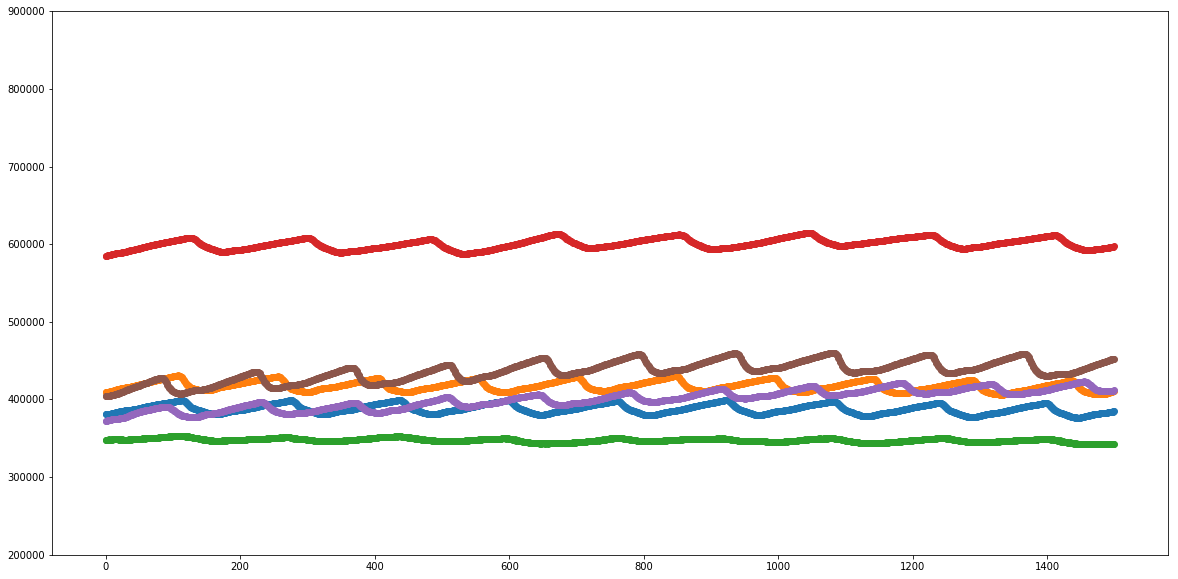

In [85]:
plt.figure(figsize=(20,10))
for i in range(6):
    plt.scatter(range(1500),test.iloc[i])
plt.ylim(200000,900000)
plt.show()